In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;


%matplotlib inline

# For Data Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# For building the LSTM Model
from keras.models import Sequential
from keras.layers import LSTM, Dense

# For evaluating the model
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Data/Scalanie2_2.csv', parse_dates=['Data'])

In [2]:
data.dropna(inplace=True)

In [3]:
data_df = data

In [4]:
data_df.rename(columns = {'(pył zawieszony PM2.5 [jednostka ug/m3])':'PM2.5'
                    , '(pył zawieszony PM10 [jednostka ug/m3])':'PM10'
                    , '(tlenek azotu [jednostka ug/m3])':'NO'
                    , '(tlenki azotu [jednostka ug/m3])':'NOs'
                    , '(tlenek węgla [jednostka ug/m3])':'CO'
                    , '(benzen [jednostka ug/m3])':'benzen'
                    , '(dwutlenek azotu [jednostka ug/m3])':'NO2'
                    , 'B00202A (2).Wynik':'Kierunek wiatru'
                    , 'Scalanie1.B00300S.Wynik':'Temperatura powietrza'
                    , 'Scalanie1.B00606S.Wynik':'Opady'
                    , 'Scalanie1.B00702A.Wynik':'Predkosc wiatru'
                    , 'Scalanie1.B00703A.Wynik':'MAX Predkosc wiatru'
                    , 'Scalanie1.B00802A.Wynik':'Wilgotnosc powietrza'
                    }, inplace = True)

In [5]:
data_df = data_df.drop(['Scalanie1.Stacja','Scalanie1.Data','Scalanie1.Rodzaj'], axis=1)

In [6]:
data_df

,Data,PM2.5,PM10,NO,NOs,CO,benzen,NO2,Temperatura powietrza,Opady,Predkosc wiatru,MAX Predkosc wiatru,Wilgotnosc powietrza,Kierunek wiatru
0,2019-01-03 07:00:00,6.8,7.3,25.1,75.7,0.3,0.5,37.3,-2.700000,0.0,6.683333,9.833333,69.333333,284.000000
1,2019-01-06 08:00:00,16.1,16.8,13.6,34.4,0.3,0.5,13.5,-5.733333,0.0,4.633333,6.666667,90.666667,351.333333
2,2019-01-15 03:00:00,9.9,10.3,0.9,7.3,0.3,0.5,6.0,-1.933333,0.0,8.550000,10.833333,78.833333,250.500000
3,2019-01-15 04:00:00,9.6,10.0,0.6,7.7,0.3,0.5,6.7,-2.116667,0.0,9.266667,11.833333,85.666667,248.166667
4,2019-03-08 05:00:00,6.8,10.3,21.4,71.6,0.3,0.5,38.9,7.150000,0.0,3.466667,3.666667,81.833333,237.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,2020-03-01 13:00:00,15.8,20.2,4.6,17.8,0.3,1.1,10.8,6.216667,0.2,5.916667,8.983333,75.000000,200.666667
26364,2021-09-19 16:00:00,12.5,16.4,11.7,37.5,0.3,1.2,19.6,8.866667,0.2,4.683333,6.250000,96.166667,256.833333
26366,2021-11-04 14:00:00,7.0,12.2,9.2,28.3,0.3,1.3,14.2,14.566667,0.2,4.766667,7.983333,78.833333,170.166667
26368,2021-12-05 08:00:00,18.7,23.2,5.7,17.9,0.3,1.6,9.1,0.200000,0.2,0.983333,1.633333,93.833333,142.000000


In [7]:
data_df.describe()

,PM2.5,PM10,NO,NOs,CO,benzen,NO2,Temperatura powietrza,Opady,Predkosc wiatru,MAX Predkosc wiatru,Wilgotnosc powietrza,Kierunek wiatru
count,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000
mean,22.090513,28.761659,24.912202,66.477684,0.451288,1.446558,29.224381,9.323174,0.067456,3.816359,5.499758,76.741014,195.154490
std,20.413648,22.899676,34.111791,64.508164,0.301597,2.247832,17.490975,8.697416,0.572861,2.194011,3.232747,18.783071,82.285708
min,0.000000,1.400000,0.000000,2.100000,0.100000,0.000000,0.900000,-17.450000,0.000000,0.000000,0.000000,14.666667,0.000000
25%,9.900000,14.900000,5.000000,24.800000,0.300000,0.500000,15.800000,2.400000,0.000000,2.133333,2.983333,64.000000,113.791667
50%,16.400000,22.900000,13.100000,47.100000,0.400000,0.800000,26.300000,8.483333,0.000000,3.433333,4.933333,81.666667,212.166667
75%,26.700000,34.500000,31.625000,85.900000,0.500000,1.600000,39.500000,15.950000,0.000000,5.116667,7.450000,92.333333,256.166667
max,282.700000,315.700000,483.100000,838.200000,4.400000,49.100000,131.500000,34.000000,36.400000,17.300000,24.283333,100.000000,357.333333


In [8]:
data_df.value_counts() 

Data                 PM2.5  PM10  NO    NOs   CO   benzen  NO2   Temperatura powietrza  Opady  Predkosc wiatru  MAX Predkosc wiatru  Wilgotnosc powietrza  Kierunek wiatru
2020-01-01 07:00:00  9.3    13.1  7.7   22.3  0.2  0.4     10.6  2.133333               0.0    5.033333         7.083333             80.000000             267.666667         2
2020-01-01 18:00:00  22.7   29.6  21.2  64.9  0.4  1.6     32.4  1.683333               0.0    6.366667         8.766667             77.000000             243.500000         2
2021-01-01 05:00:00  25.5   30.8  2.1   7.2   0.4  0.8     3.9   0.833333               0.0    4.183333         5.066667             100.000000            249.000000         2
2021-01-01 04:00:00  31.4   36.9  1.8   8.1   0.5  0.9     5.4   1.166667               0.0    4.100000         5.050000             100.000000            253.666667         2
2021-01-01 03:00:00  34.6   40.5  1.6   8.8   0.5  1.1     6.3   1.516667               0.0    3.316667         4.650000     

In [9]:
data_df = data_df.reset_index()
six_df = pd.DataFrame()
twelve_df = pd.DataFrame()
tf_df = pd.DataFrame()
do_tylu = 10
for i in range(len(data_df)):
    six_df = pd.concat([six_df,pd.DataFrame({'Temp past avg 3h':[sum(data_df['Temperatura powietrza'].iloc[i:i+do_tylu])/do_tylu]}, index = [i+do_tylu])])
    twelve_df = pd.concat([twelve_df,pd.DataFrame({'Opady past avg 3h':[sum(data_df['Opady'].iloc[i:i+do_tylu])/do_tylu]}, index = [i+do_tylu])])
    tf_df = pd.concat([tf_df,pd.DataFrame({'Predkosc wiatru past avg 6h':[sum(data_df['Predkosc wiatru'].iloc[i:i+do_tylu])/do_tylu]}, index = [i+do_tylu])])
   
data_df = pd.merge(data_df, six_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, twelve_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, tf_df, left_index=True, right_index=True)


In [10]:
# data_df['H'] = pd.to_datetime(data_df['Data']).dt.time
# data_df['H'] = data_df['H'].astype('string')

In [11]:
# data_df['H'] = data_df['H'].str.replace(r'\D', '')

In [12]:
# data_df['H'] = data_df['H'].str.replace(r'.{4}$', '')


In [13]:
# data_df['H'] = data_df['H'].astype('float')

In [14]:
data_df = data_df.drop('index', axis=1)
data_df['Data'] = pd.to_datetime(data_df['Data'], format='%Y%m%d %H')
data_df.index = data_df['Data']
data_df = data_df.drop('Data', axis=1)

In [15]:
data_df.dtypes

PM2.5                          float64
PM10                           float64
NO                             float64
NOs                            float64
CO                             float64
benzen                         float64
NO2                            float64
Temperatura powietrza          float64
Opady                          float64
Predkosc wiatru                float64
MAX Predkosc wiatru            float64
Wilgotnosc powietrza           float64
Kierunek wiatru                float64
Temp past avg 3h               float64
Opady past avg 3h              float64
Predkosc wiatru past avg 6h    float64
dtype: object

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(data_df)
data_df2 = pd.DataFrame(values)

In [17]:
values

array([[0.0311284 , 0.02768056, 0.06644587, ..., 0.38522613, 0.        ,
        0.73411805],
       [0.02051645, 0.01877187, 0.06127096, ..., 0.40466738, 0.        ,
        0.72840575],
       [0.0576583 , 0.05408845, 0.03249845, ..., 0.43394056, 0.        ,
        0.74277307],
       ...,
       [0.02476123, 0.03436207, 0.01904368, ..., 0.50302378, 0.02699055,
        0.40193872],
       [0.06614786, 0.06936048, 0.0117988 , ..., 0.5102957 , 0.02699055,
        0.40540073],
       [0.02652989, 0.02990773, 0.00206996, ..., 0.47890773, 0.02699055,
        0.39103341]])

In [18]:
data_df2.columns = data_df.columns
data_df2.index = data_df.index 

In [19]:
data_df2.dropna(inplace=True)

In [20]:
dataset = np.log1p(data_df2[['PM2.5']].values)
dataset.shape

(22274, 1)

<Figure size 864x360 with 0 Axes>

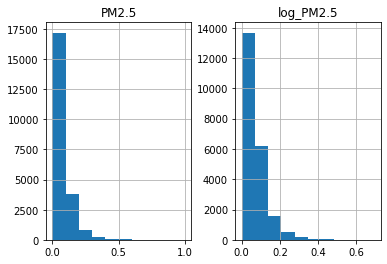

In [21]:
dist_df = pd.DataFrame({'PM2.5' : data_df2['PM2.5'].values, 'log_PM2.5' : dataset[:,0]})

# histogram plot original vs log transform data
plt.figure(figsize=(12,5))
dist_df.hist();

In [22]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

17819 4455


In [23]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('Shape of trainX :', trainX.shape)
print('Shape of trainY :', trainY.shape)
print('Shape of testX :', testX.shape)
print('Shape of testY :', testY.shape)

Shape of trainX : (17817, 1)
Shape of trainY : (17817,)
Shape of testX : (4453, 1)
Shape of testY : (4453,)


In [25]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('Shape of trainX :', trainX.shape)
print('Shape of testX :', testX.shape)

Shape of trainX : (17817, 1, 1)
Shape of testX : (4453, 1, 1)


In [26]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
557/557 - 2s - loss: 0.0012 - 2s/epoch - 3ms/step
Epoch 2/100
557/557 - 1s - loss: 5.4752e-04 - 516ms/epoch - 926us/step
Epoch 3/100
557/557 - 0s - loss: 4.8801e-04 - 490ms/epoch - 879us/step
Epoch 4/100
557/557 - 1s - loss: 4.9073e-04 - 501ms/epoch - 899us/step
Epoch 5/100
557/557 - 0s - loss: 4.8957e-04 - 495ms/epoch - 890us/step
Epoch 6/100
557/557 - 1s - loss: 4.8936e-04 - 530ms/epoch - 951us/step
Epoch 7/100
557/557 - 0s - loss: 4.9075e-04 - 478ms/epoch - 858us/step
Epoch 8/100
557/557 - 0s - loss: 4.8988e-04 - 476ms/epoch - 855us/step
Epoch 9/100
557/557 - 0s - loss: 4.9076e-04 - 476ms/epoch - 854us/step
Epoch 10/100
557/557 - 1s - loss: 4.8927e-04 - 551ms/epoch - 990us/step
Epoch 11/100
557/557 - 0s - loss: 4.9107e-04 - 471ms/epoch - 846us/step
Epoch 12/100
557/557 - 0s - loss: 4.8955e-04 - 481ms/epoch - 863us/step
Epoch 13/100
557/557 - 1s - loss: 4.9094e-04 - 509ms/epoch - 913us/step
Epoch 14/100
557/557 - 0s - loss: 4.8902e-04 - 488ms/epoch - 875us/step
Epoch 15/1

In [27]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = np.expm1(trainPredict)
trainY = np.expm1(trainY)
testPredict = np.expm1(testPredict)
testY = np.expm1(testY)

In [28]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.02 RMSE
Test Score: 0.06 RMSE


In [29]:
test_series = pd.Series(testY)

# state of model performance
if testScore < test_series.std():
    print('\n[ Model performance is GOOD enough ]')
    print('\nRMSE of test prediction < Standard deviation of test dataset')
    print('%.2f' % (testScore), '<', '%.2f' % (test_series.std()))
else:
    print('\n[ Model performance is NOT GOOD enough ]')
    print('\nRMSE of test prediction > Standard deviation of test dataset')
    print('%.2f' % (testScore), '>', '%.2f' % (test_series.std()))


[ Model performance is GOOD enough ]

RMSE of test prediction < Standard deviation of test dataset
0.06 < 0.12


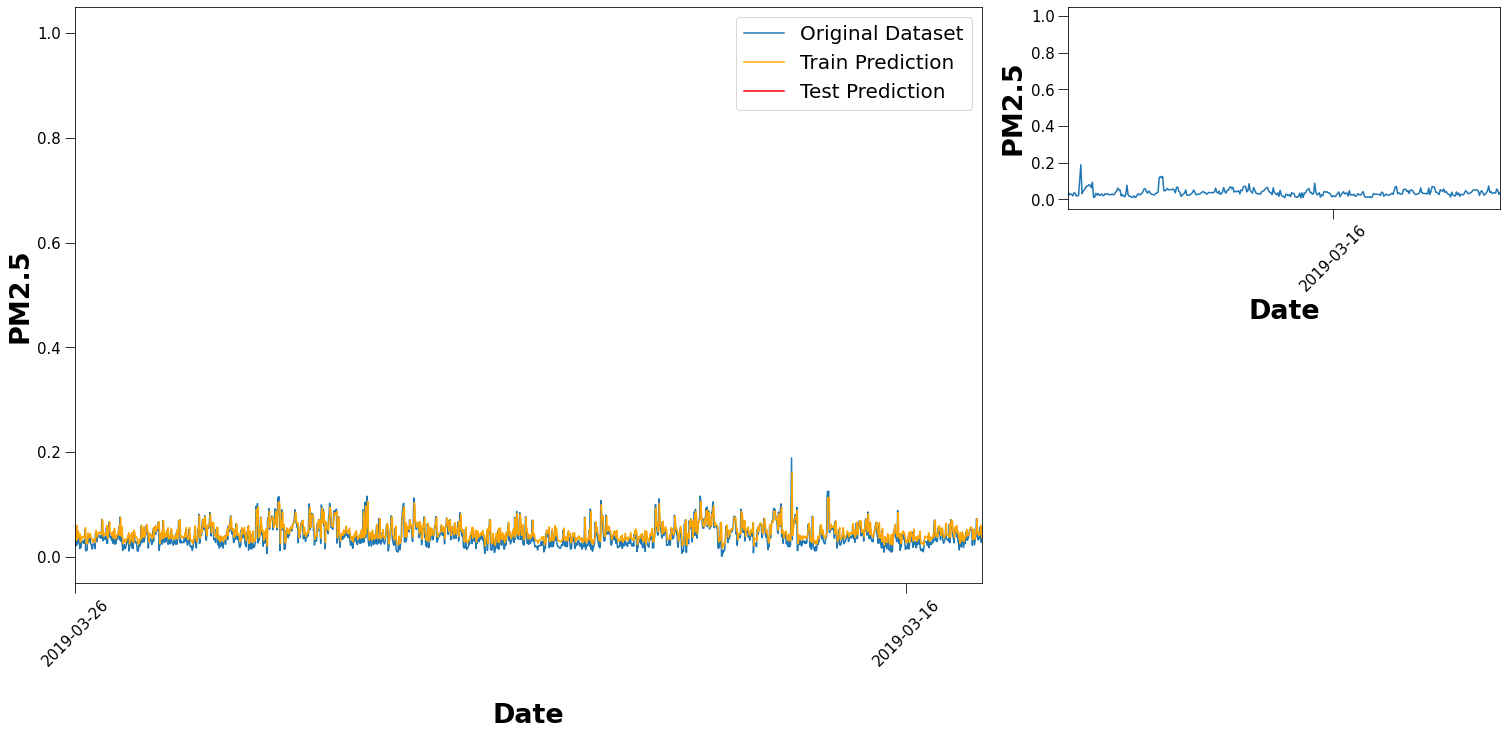

In [30]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot original dataset and predictions
time_axis = np.linspace(0, dataset.shape[0]-1, 15)
time_axis = np.array([int(i) for i in time_axis])
time_axisLab = np.array(data_df.index, dtype='datetime64[D]')

fig = plt.figure()
ax = fig.add_axes([0, 0, 2.1, 2])
ax.plot(np.expm1(dataset), label='Original Dataset')
ax.plot(trainPredictPlot, color='orange', label='Train Prediction')
ax.plot(testPredictPlot, color='red', label='Test Prediction')
ax.set_xticks(time_axis)
ax.set_xticklabels(time_axisLab[time_axis], rotation=45)
ax.set_xlabel('\nDate', fontsize=27, fontweight='bold')
ax.set_ylabel('PM2.5', fontsize=27, fontweight='bold')
ax.legend(loc='best', prop= {'size':20})
ax.tick_params(size=10, labelsize=15)
ax.set_xlim([-1,1735])

ax1 = fig.add_axes([2.3, 1.3, 1, 0.7])
ax1.plot(np.expm1(dataset), label='Original Dataset')
ax1.plot(testPredictPlot, color='red', label='Test Prediction')
ax1.set_xticks(time_axis)
ax1.set_xticklabels(time_axisLab[time_axis], rotation=45)
ax1.set_xlabel('Date', fontsize=27, fontweight='bold')
ax1.set_ylabel('PM2.5', fontsize=27, fontweight='bold')
ax1.tick_params(size=10, labelsize=15)
ax1.set_xlim([1360,1735]);

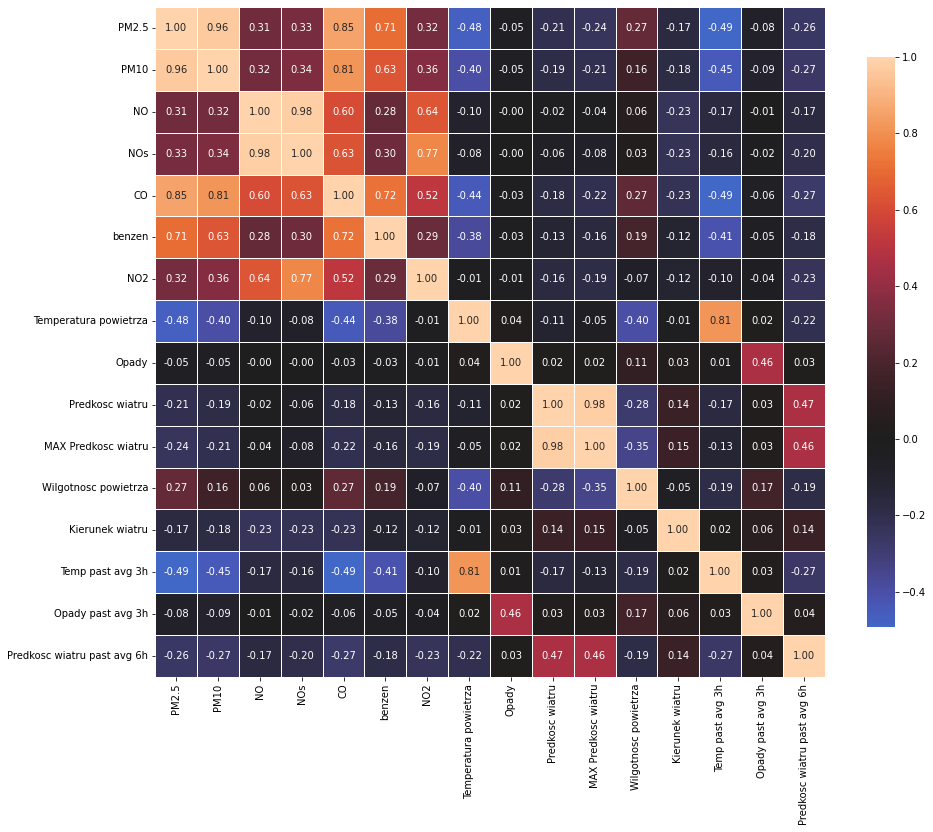

In [31]:
correlations = data_df2.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();
#ciekawa sprawa, im wiekszy czas do tyłu w kontekscie wiatru, tym wieksza korelacja xd

In [50]:
bins = [-1, 2, 4, 6, 8, 10, np.inf]
names = ['0-2 km/h', '10-20 km/h', '20-30 km/h', '30-40 km/h', '40-50 km/h','>50 km/h']
data_df['speed_kmhRange'] = pd.cut(data_df['Predkosc wiatru'], bins, labels=names)

In [51]:
bins = [-1, 10, 30, 50, 70,100, np.inf]
names = ['0-10', '10-30', '30-50', '50-70', '70-100','>1000']
data_df['PM2.5Range'] = pd.cut(data_df['PM2.5'], bins, labels=names)

In [52]:
bins = np.linspace(0, 360, 17)+11.25
bins = np.insert(bins, 0, 0)
names = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW', 'N2']
data_df['kierunek_range'] = pd.cut(data_df['Kierunek wiatru'], bins, labels=names)
data_df['kierunek_range']= data_df['kierunek_range'].replace('N2', 'N')


In [53]:
df = px.data.wind()

In [54]:
df

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4
...,...,...,...
123,WSW,6+,0.1
124,W,6+,0.9
125,WNW,6+,2.2
126,NW,6+,1.5


In [55]:
data_df.tail(100)

,Data,PM2.5,PM10,NO,NOs,CO,benzen,NO2,Temperatura powietrza,Opady,...,MAX Predkosc wiatru,Wilgotnosc powietrza,Kierunek wiatru,Temp past avg 3h,Opady past avg 3h,Predkosc wiatru past avg 6h,speed_kmhRange,PM2.5Range,kierunek_range,M
22174,NaT,17.5,24.0,47.6,99.8,0.5,0.5,26.9,-0.333333,0.0,...,15.766667,88.833333,95.333333,11.205000,0.0,4.115000,>50 km/h,10-30,E,12
22175,NaT,13.1,17.0,2.2,6.7,0.3,0.4,3.2,0.200000,0.0,...,15.550000,90.166667,99.500000,1.768333,0.0,6.121667,>50 km/h,10-30,E,12
22176,NaT,18.9,27.2,70.8,145.0,0.6,0.6,36.4,-0.300000,0.0,...,15.600000,88.000000,95.166667,1.508333,0.0,7.361667,>50 km/h,10-30,E,12
22177,NaT,1.3,1.4,2.4,10.0,0.2,0.2,6.4,6.083333,0.0,...,17.166667,60.166667,269.000000,11.470000,0.0,8.300000,>50 km/h,0-10,W,3
22178,NaT,23.8,29.2,9.0,25.2,0.4,0.7,11.4,-3.116667,0.0,...,15.166667,86.666667,93.833333,0.308333,0.0,5.453333,>50 km/h,10-30,E,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22269,NaT,1.7,1.7,1.6,7.9,0.2,0.4,5.4,5.433333,0.1,...,20.666667,74.500000,261.500000,2.625000,0.1,6.423333,>50 km/h,0-10,W,3
22270,NaT,13.4,20.0,5.2,15.9,0.3,0.6,12.5,12.666667,0.0,...,21.100000,66.333333,258.333333,13.043333,0.0,5.031667,>50 km/h,10-30,WSW,5
22271,NaT,1.6,1.7,1.0,5.2,0.1,0.3,3.7,8.066667,0.0,...,21.166667,55.500000,249.833333,13.385000,0.0,4.471667,>50 km/h,0-10,WSW,3
22272,NaT,1.2,1.5,1.3,6.0,0.1,0.2,4.1,6.483333,0.0,...,23.833333,61.166667,249.333333,4.230000,0.0,5.380000,>50 km/h,0-10,WSW,3


In [56]:
import plotly.express as px

In [57]:
data_df = data_df.sort_values(by="PM2.5")
#tutaj TO DO: ogarnac te wykresy, bo chyba sa zle, nie sa grupowane i to pewnie to

In [58]:
fig = px.bar_polar(data_df, r="PM2.5Range", theta="kierunek_range", color='speed_kmhRange', template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [39]:
data_df = data_df.sort_values(by="Predkosc wiatru")
fig = px.bar_polar(data_df, r="Predkosc wiatru", theta="kierunek_range")
fig.show()

In [40]:
data_df = data_df.reset_index()

In [41]:
data_df['M'] = pd.to_datetime(data_df['Data']).dt.month

In [42]:
#sns.jointplot(x=data_df['Opady 6hr_avg'], y=data_df['PM2.5'], data = data_df)

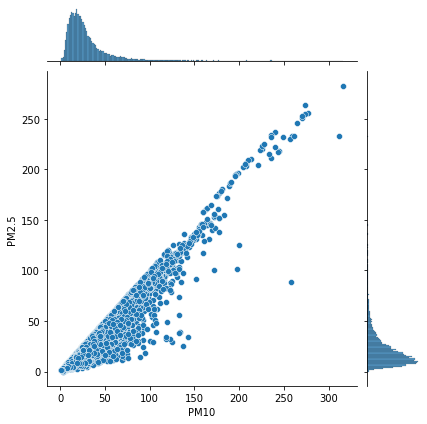

In [43]:
sns.jointplot(x=data_df['PM10'], y=data_df['PM2.5'], data = data_df)

In [44]:
data_df['Data'] = pd.to_datetime(data['Data'], format='%Y%m%d %H')
data.groupby(pd.to_datetime(data['Data']).dt.hour).count()


,Data,PM2.5,PM10,NO,NOs,CO,benzen,NO2,Scalanie1.Data,Scalanie1.Stacja,Scalanie1.Rodzaj,Temperatura powietrza,Opady,Predkosc wiatru,MAX Predkosc wiatru,Wilgotnosc powietrza,Kierunek wiatru
Data,,,,,,,,,,,,,,,,,
0,934,934,934,934,934,934,934,934,934,934,934,934,934,934,934,934,934
1,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917
2,934,934,934,934,934,934,934,934,934,934,934,934,934,934,934,934,934
3,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929
4,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929
5,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932
6,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944
7,947,947,947,947,947,947,947,947,947,947,947,947,947,947,947,947,947
8,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939


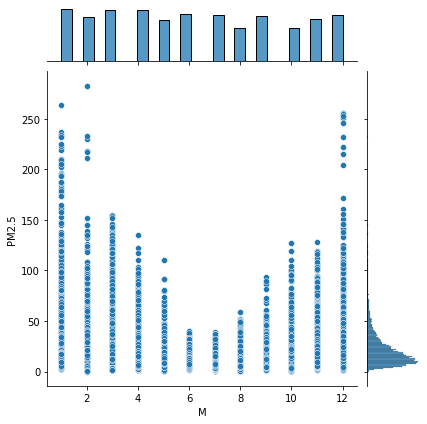

In [45]:
sns.jointplot(x=data_df['M'], y=data_df['PM2.5'], data = data_df)

In [46]:
# temp_df = pd.DataFrame()
# for i in range(len(data_df)):
#     temp_df = pd.concat([temp_df,pd.DataFrame({'PM2.5 6hr_avg':[sum(data_df['AirTemperature'].iloc[i:i+6])/6]}, index = [i+6])]) 
# data_df = pd.merge(data_df, six_df, left_index=True, right_index=True)